In [41]:
import pandas as pd
import  numpy as np 
import networkx as nx 
import seaborn as sns
from tqdm.notebook import tqdm
import netwulf
from networkx.readwrite import json_graph
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [42]:
reviews = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
movies = pd.read_csv('rotten_tomatoes_movies.csv')

In [43]:
movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [44]:
movies['original_release_date'] = pd.to_datetime(movies['original_release_date'])

In [45]:
movies.tail(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1
17711,m/zulu_dawn,Zulu Dawn,Sir Henry Bartle Frere's (John Mills) vastly o...,NaN,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,...,Tango Entertainment,Rotten,50.0,8.0,Upright,62.0,4469.0,0,4,4


In [46]:
ds = f'Total number of movies: {len(movies)}\nTotal number of reviews: {len(reviews)}'
print(ds)

Total number of movies: 17712
Total number of reviews: 1130017


In [47]:
movies['actors'] = movies['actors'].apply(lambda x: str(x).split(','))

### Create a new variable called gender
This will ad a list of the genders for the actors, the genders are in the same order as the actors. We will utilize the gender guesser api to do this.  

In [48]:
import gender_guesser.detector as gender
d = gender.Detector()

In [49]:
pd.options.mode.chained_assignment = None
movies['actor_genders'] = ' '
for idx,row in movies.iterrows():
    
    genders = []
    for actor in row['actors']:
        if actor == '' or actor == ' ':
            continue
        actor = actor.split(' ')
        if actor[0] == ' ' or actor[0] == '':
            actor_first_name = actor[1] 
        else: 
            actor_first_name = actor[0]
        gender = d.get_gender(actor_first_name)
        genders.append(gender)
    
    movies.iloc[idx,-1] = ','.join(genders)
movies['actor_genders'] = movies['actor_genders'].apply(lambda x: x.split(','))

### Crate variable called male and female count 

In [50]:
movies['male_count'] = movies['actor_genders'].apply(lambda x: sum([1 if g == 'male' or g == 'mostly_male' else 0 for g in x]))
movies['female_count'] = movies['actor_genders'].apply(lambda x: sum([1 if g == 'female' or g == 'mostly_female' else 0 for g in x]))

In [51]:
movies['dominant_gender'] = movies.apply(lambda x: 'male' if x['male_count'] > x['female_count'] else 'female', axis = 1)

<Axes: xlabel='audience_rating', ylabel='Percent'>

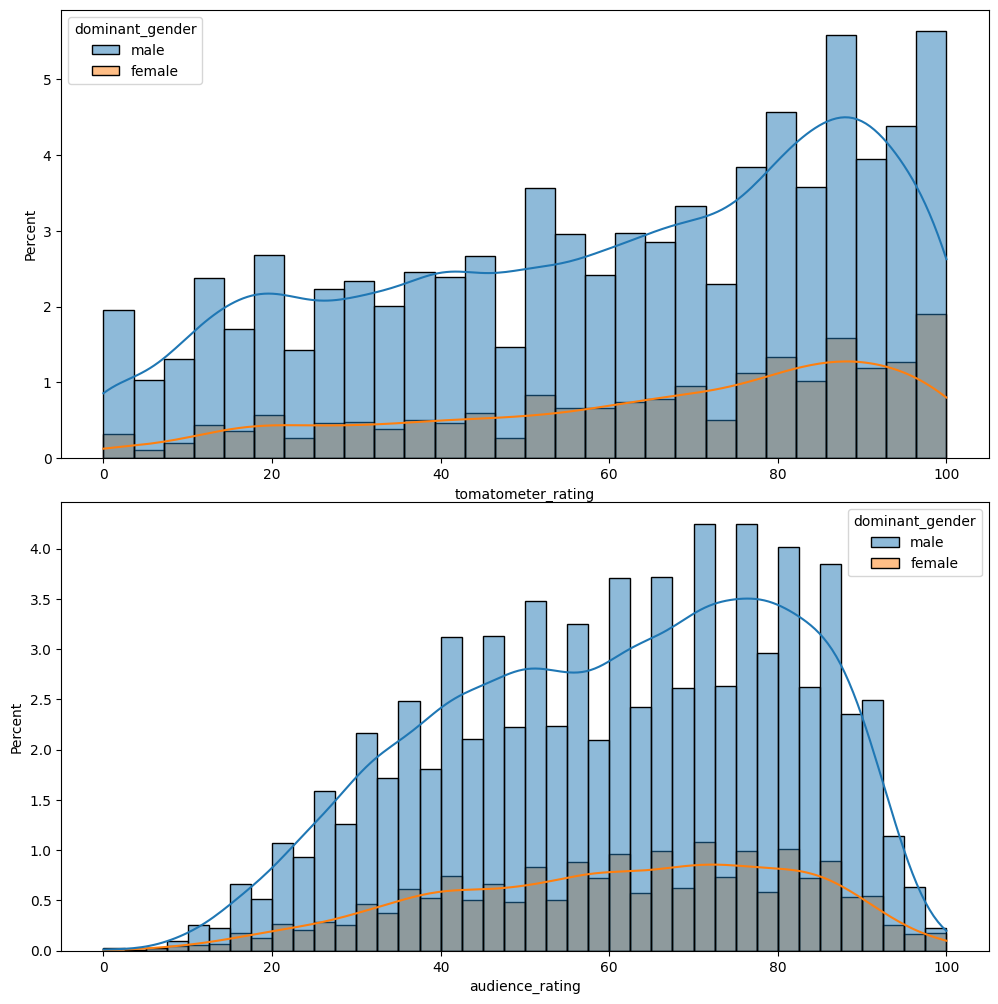

In [53]:
fig,ax = plt.subplots(2,1,figsize = (10,10))
plt.tight_layout()
sns.histplot(data = movies,
             x = 'tomatometer_rating',
             hue = 'dominant_gender',
             kde=True,
             stat ='percent',
             ax = ax[0])

sns.histplot(data = movies,
             x = 'audience_rating',
             hue = 'dominant_gender',
             kde = True,
             stat ='percent',
             ax = ax[1])
#fig.suptitle('Comparing audience vs. critics')

#### How many men and females in the data-set?


In [18]:
s = f'Ammount of male actors: {movies.male_count.sum()}\nAmmount of female actors: {movies.female_count.sum()}'
print(s)

Ammount of male actors: 264733
Ammount of female actors: 121697


### Constructing the graph
Here we will construct the graph, with each node being a movie connected by the actors. The movies will be indexed by the unique rotten tomatoes link, since some movies contains remakes, of old movies and thus they still have the same title.

The weighted edgelist is created such, that the weights of the edges are equal to the size of the set of the actors shared by two movies. 

In [19]:
def get_weighted_edge_list(movies_df):
    '''
    movies: A pandas dataframe containing the movie data-set from rotten tomatoes
    return: returns a weighted edgelist to which can be read by networkx, each edge is
    represented as: (Movie1,Movie2,weight) where the weight indicates how many actors appear
    in both movies. 
    '''
    # convert the list of actors for each movie into a set
    movies_df['actors_set'] = movies_df['actors'].apply(set)
    
    # create an empty DataFrame to store the edge list
    edge_list = []#pd.DataFrame(columns=['movie1', 'movie2', 'weight'])
    actors = {}
    # compare each pair of movies in the DataFrame
    for i in tqdm(range(len(movies_df))):
        for j in range(i + 1, len(movies_df)):
            # find the actors that are shared between the two movies
            shared_actors = movies_df.loc[i, 'actors_set'].intersection(movies_df.loc[j, 'actors_set'])
            if shared_actors:
                # create an edge between the two movies and set the weight to the number of shared actors
                #edge_list.append()
                edge_list.append((
                    movies_df.loc[i, 'rotten_tomatoes_link'],
                    movies_df.loc[j, 'rotten_tomatoes_link'],
                    len(shared_actors)
                ))
                actors[(movies_df.loc[i, 'rotten_tomatoes_link'],
                        movies_df.loc[j, 'rotten_tomatoes_link'])] = shared_actors
                
    return edge_list,actors

In [20]:
weighted_edge_list,actors = get_weighted_edge_list(movies)

  0%|          | 0/17712 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [58]:
G = nx.Graph()
G.add_weighted_edges_from(weighted_edge_list)

#### Add the actors set as attributes to each edge
As an edge attribute the set of shared actos are addded. This can prove usefull if the graph is to be inverted to the bigraph. 

In [61]:
for mov1,mov2 in G.edges:
    try:
        G[mov1][mov2]['Actors'] = list(actors[(mov1,mov2)])
    except:
        G[mov1][mov2]['Actors'] = list(actors[(mov2,mov1)])

In [62]:
data = json_graph.node_link_data(G)
# save the data to a JSON file
with open('graph_tomato_link.json', 'w') as f:
    json.dump(data, f)

### Load the graph in from a json file 

In [2]:
with open('graph_tomato_link.json', 'r') as f:
    data = json.load(f)

G = json_graph.node_link_graph(data)
len(G)

17018

#### Find giant connected component and use that

In [22]:
G['m/0814255']

AtlasView({'m/10004352-going_the_distance': {'weight': 1, 'Actors': [' Christie Laing']}, 'm/10008849-married_life': {'weight': 1, 'Actors': [' Suzanne Ristic']}, 'm/10011582-TRON_legacy': {'weight': 2, 'Actors': [' Serinda Swan', ' Conrad Coates']}, 'm/10011815-hole': {'weight': 1, 'Actors': [' Merritt Patterson']}, 'm/10012039-lottery_ticket': {'weight': 1, 'Actors': [' Brandon T. Jackson']}, 'm/10012063-ghost_writer': {'weight': 1, 'Actors': [' Pierce Brosnan']}, 'm/10012150-high_school': {'weight': 1, 'Actors': [' Max Van Ville']}, 'm/1005199-dangerous_liaisons': {'weight': 1, 'Actors': [' Uma Thurman']}, 'm/1017641-risky_business': {'weight': 1, 'Actors': [' Joe Pantoliano']}, 'm/1018009-running_scared': {'weight': 1, 'Actors': [' Joe Pantoliano']}, 'm/1019743-squeeze': {'weight': 1, 'Actors': [' Joe Pantoliano']}, 'm/1028561-where_the_heart_is': {'weight': 1, 'Actors': [' Uma Thurman']}, 'm/1034067-switch': {'weight': 1, 'Actors': [' Catherine Keener']}, 'm/1034131-field': {'weig

In [23]:
movies.head(3)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,actor_genders,male_count,female_count,dominant_gender,actors_set
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","[Logan Lerman, Brandon T. Jackson, Alexandra...",2010-02-12,...,53.0,254421.0,43,73,76,"[mostly_male, male, female, male, male, male, ...",42,37,male,"{ Elisa King, Jade Pawluk, David L. Smith, ..."
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"[Catherine Keener, Amanda Peet, Oliver Platt...",2010-04-30,...,64.0,11574.0,44,123,19,"[female, female, male, female, female, female,...",2,6,female,"{Catherine Keener, Ann Morgan Guilbert, Oliv..."
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"[Dudley Moore, Bo Derek, Julie Andrews, Rob...",1979-10-05,...,53.0,14684.0,2,16,8,"[male, male, female, male, mostly_female, most...",22,19,male,"{ Dee Wallace, Owen Sullivan, Deborah Rush, ..."


In [26]:
movies = movies.set_index('rotten_tomatoes_link')

In [44]:
# loop through each node in the graph
remove = []
for node in G.nodes():
    # get the corresponding data from the dataframe
    data = movies.loc[node, 'original_release_date']
    if str(type(data)) == "<class 'pandas.core.series.Series'>": 
        data = data[0]
    # check if the data is above the year 2005
    if data.year > 1980:
        # if it is, keep the node in the graph
        continue
    else:
        # if it is not, remove the node from the graph
        remove.append(node)

G.remove_nodes_from(remove)

In [212]:
s = max(nx.connected_components(G), key=len)
G = G.subgraph(s)

In [323]:
len(G),G.number_of_edges()

(13511, 1006428)

### Vizualise with netwulf

In [187]:
# visualize the graph using netwulf
netwulf.visualize(G)

(None, None)

## Add the gender of the actors to as node attributes

In [45]:
for idx,edge in enumerate(G.edges()):
    
    actors = G[edge[0]][edge[1]]['Actors']
    genders = []
    for actor in actors:
        if actor == '' or actor == ' ':
            continue
        actor = actor.split(' ')
        if actor[0] == ' ' or actor[0] == '':
            actor_first_name = actor[1] 
        else: 
            actor_first_name = actor[0]
        gender = d.get_gender(actor_first_name)
        genders.append(gender)
    
    G[edge[0]][edge[1]]['actor_genders'] = genders

### Check that the atributes has been set correctly

In [46]:
for i,edge in enumerate(G.edges()):
    print(i)
    print(edge)
    print(G[edge[0]][edge[1]])
    if i > 3: 
        break

0
('m/0814255', 'm/10004352-going_the_distance')
{'weight': 1, 'Actors': [' Christie Laing'], 'actor_genders': ['mostly_female']}
1
('m/0814255', 'm/10008849-married_life')
{'weight': 1, 'Actors': [' Suzanne Ristic'], 'actor_genders': ['female']}
2
('m/0814255', 'm/10011582-TRON_legacy')
{'weight': 2, 'Actors': [' Serinda Swan', ' Conrad Coates'], 'actor_genders': ['unknown', 'male']}
3
('m/0814255', 'm/10011815-hole')
{'weight': 1, 'Actors': [' Merritt Patterson'], 'actor_genders': ['male']}
4
('m/0814255', 'm/10012039-lottery_ticket')
{'weight': 1, 'Actors': [' Brandon T. Jackson'], 'actor_genders': ['male']}


### Set a node atribute for director gender and most common actor gender

In [47]:
def is_pd_series(x):
    if str(type(x)) == "<class 'pandas.core.series.Series'>":
        return True
    else:
        return False

#### Creating a dictionary containing the attributes 
Now a dictionary of dictionaries will be created containing the attributes, that is to be set on the nodes. 

The following attributes will be added to the nodes: 
- Movie title 
- Tomato meter rating
- Audience rating 
- Genders 
- Genres
-  Production companies
- Content rating


In [48]:
att = {}
Nan_directors = []
most_freq = lambda List: max(set(List), key = List.count)
for node in G.nodes():
    
    #Extract the relevant collumns
    title = movies.loc[node]['movie_title']
    tomato_rating = movies.loc[node]['tomatometer_rating']
    audience_rating = movies.loc[node]['audience_rating']
    genders = movies.loc[node]['actor_genders']
    genres =  movies.loc[node]['genres']
    production_company = movies.loc[node]['production_company']
    content_rating = movies.loc[node]['content_rating']
    directors = [movies.loc[node]['directors']]
    original_release_date = movies.loc[node]['original_release_date']
    
    if str(directors[0]) == 'nan':
        directors = ['nan']
    #elif 
    
    #Get the most common genders
    director_genders = [d.get_gender(director.split(' ')[0]) for director in directors]
    most_freq_director_gender = most_freq(director_genders)
    
    #Change the most frequent to male or female
    if most_freq_director_gender == 'mostly_male':
        most_freq_director_gender = 'male'
    elif most_freq_director_gender == 'mostly_female':
        most_freq_director_gender = 'female'
    elif str(type(most_freq_director_gender)) != "<class 'str'>":
        print(str(type(most_freq_director_gender)))
    
    most_freq_actor_gender = most_freq(genders)
    
    att[node] = {'title': title,
                 'tomato_rating':tomato_rating if str(tomato_rating) != 'nan' else 0,
                 'audience_rating':audience_rating if str(audience_rating) != 'nan' else 0,
                 'genders':genders,
                 'production_company': production_company,
                 'most_freq_actor_gender': most_freq_actor_gender,
                 'most_freq_director_gender': most_freq_director_gender,
                 'genre':genres,
                 'content_rating': content_rating,
                 'original_release_date': original_release_date.strftime('%Y-%m-%d %H:%M:%S')}

In [49]:
nx.set_node_attributes(G,att)

In [50]:
G.nodes['m/0814255']['original_release_date']

'2010-02-12 00:00:00'

In [3]:
data = nx.node_link_data(G)
filename = 'graph_with_att.json'
with open(filename, 'w') as file:
    json.dump(data, file, indent=4)

NameError: name 'G' is not defined

### Now we can answer the question: Does directors of the same gender tend to hire the same actors?
In order to do so, the assortivity with respect to the gender of the director is found. 

In [19]:
from networkx.algorithms.assortativity import attribute_assortativity_coefficient

In [330]:
# calculate the attribute assortativity
assortativity = attribute_assortativity_coefficient(G, 'most_freq_director_gender')
print(f"Attribute assortativity: {assortativity:.3f}")

Attribute assortativity: 0.033


### Now do the same for the gender of the actors
The calculation of this coeficient will answer if a gender dominates a cast, are they then also often appearing in other gender dominated casts in other movies? 

##### Note 
This one is a bit weird it gives wastly different results if we run on the entire graph or just thresholded giant connected component for some reason

In [331]:
# calculate the attribute assortativity
assortativity = attribute_assortativity_coefficient(G, 'most_freq_actor_gender')
print(f"Attribute assortativity: {assortativity:.3f}")

Attribute assortativity: 0.272


In [332]:
# calculate the attribute assortativity
assortativity = attribute_assortativity_coefficient(G, 'production_company')
print(f"Attribute assortativity: {assortativity:.3f}")

Attribute assortativity: 0.008


#### Assortivity with respect to rating
The data-set consists of two types of ratings, one which is made by the general public and one which is made by actual movie critics. One thing that was hypothesised before conducting the test was that movie critics would be less biased due to their more professional knowledge of movies, where as the general audience generaly speaking tends to be more affected by seeing familiar faces. 

The reason numeric assortivity would tell something about this hypothesis, is that movies with high reviews tend to often connect with other highly reviewed movies, they share the actors between, meaning if assortivity is found between movies with respect to rating, it would point towards bias against certain actors.
*This could lead to an argument about correlation vs. causation, however in this case the naive approach will be assumed*

In [333]:
nx.numeric_assortativity_coefficient(G,'tomato_rating')

0.09511000686187794

In [334]:
nx.numeric_assortativity_coefficient(G,'audience_rating')

0.038686129193401725

This means that actually quite opposite of the original hypothesis, the audience tends to be less biased against certain actors, than the movie critics are. While the correlation of the movie critics might not be really high, it is noteworhely higher than the correlation coefficient of the audience rating. 

#### Degree assortivity 

In [335]:
nx.degree_assortativity_coefficient(G)

0.11406807990466936

### Evolution over time 
One thing that is often claimed by the movie industry is their progress towards a more gender equal structure. The validity of these claims can be testet by getting the subgraph for each year, and analysing that. 

In [336]:
def subgraph_by_year(G, year):
    """
    Returns a subgraph of G containing only the nodes with an 'original_release_date'
    attribute in the specified year.
    """
    # Create a dictionary mapping node names to release dates
    release_dates = {n: G.nodes[n]['original_release_date'] for n in G.nodes()}
    
    # Create a list of nodes that have an 'original_release_date' in the specified year
    year_nodes = [n for n in release_dates if release_dates[n].year == year]
    
    # Create a subgraph containing only the nodes in year_nodes
    subgraph = G.subgraph(year_nodes)
    
    return subgraph

In [367]:
# Define the range of years to compute degree assortativity for
years = range(1990, 2021)

# Create an empty list to store the degree assortativity values for each year
assortativity_values = []
assortativity_values_gender = []

# Compute the degree assortativity for each year and store the results in assortativity_values
for year in years:
    subgraph = subgraph_by_year(G, year)
    assortativity = nx.degree_assortativity_coefficient(subgraph)
    assortativity_values.append(assortativity)
    assortativity_gender = attribute_assortativity_coefficient(subgraph, 'most_freq_actor_gender')

    assortativity_values_gender.append(assortativity_gender)

# Create a pandas dataframe with the year and assortativity values
df = pd.DataFrame({'Year': years, 'Assortativity': assortativity_values})
df_gender = pd.DataFrame({'Year': years, 'Assortativity_gender': assortativity_values_gender})

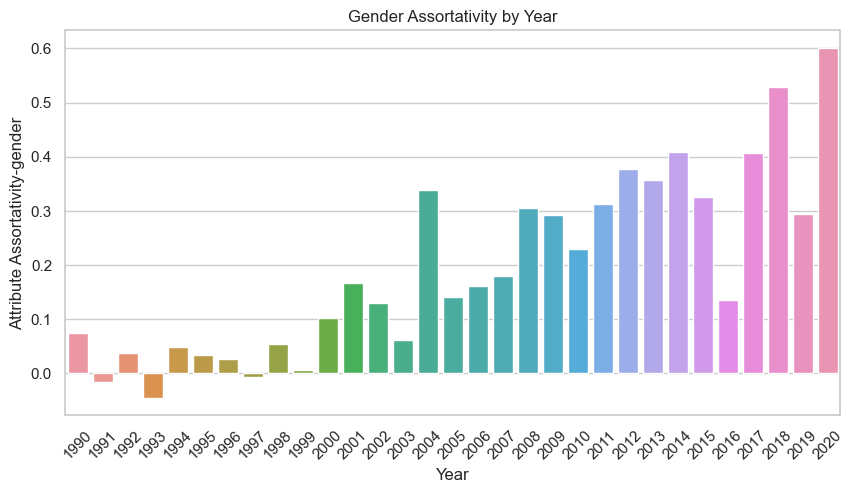

In [371]:
plt.subplots(1,1,figsize = [10,5])
sns.barplot(data = df_gender, x ='Year', y = 'Assortativity_gender')
plt.xlabel('Year')
plt.ylabel('Attribute Assortativity-gender')
plt.title('Gender Assortativity by Year')
plt.xticks(rotation=45)
plt.show()

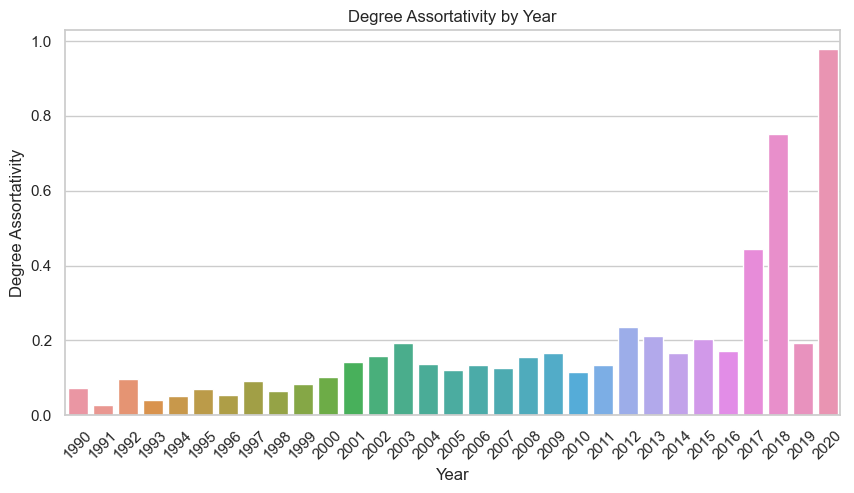

In [363]:
# Create a barplot of the degree assortativity values by year using seaborn's barplot() function
plt.subplots(1,1,figsize = [10,5])
sns.set(style="whitegrid")
sns.barplot(x='Year', y='Assortativity', data=df)
plt.xlabel('Year')
plt.ylabel('Degree Assortativity')
plt.title('Degree Assortativity by Year')
plt.xticks(rotation=45)
plt.show()

### Find and viz degree distribution of G

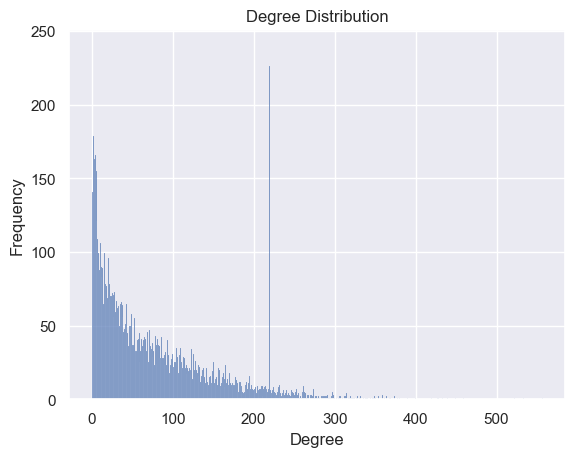

In [257]:
# get the degree of each node
degrees = [G.degree(node) for node in G.nodes()]
sns.set_theme()
# plot the degree distribution as a histogram
sns.histplot(degrees, bins=range(max(degrees)+2))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [376]:
movies = movies.reset_index()

In [377]:
movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,actor_genders,male_count,female_count,actors_set,dominant_gender
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","[Logan Lerman, Brandon T. Jackson, Alexandra...",2010-02-12,...,53.0,254421.0,43,73,76,"[mostly_male, male, female, male, male, male, ...",42,37,"{ Melina Kanakaredes, Ray Winstone, Marielle...",male
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"[Catherine Keener, Amanda Peet, Oliver Platt...",2010-04-30,...,64.0,11574.0,44,123,19,"[female, female, male, female, female, female,...",2,6,"{ Rebecca Hall, Kevin Corrigan, Amanda Peet,...",female
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"[Dudley Moore, Bo Derek, Julie Andrews, Rob...",1979-10-05,...,53.0,14684.0,2,16,8,"[male, male, female, male, mostly_female, most...",22,19,"{ Sam Jones III, Marcy Hanson, Denise Crosby...",male
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"[Martin Balsam, John Fiedler, Lee J. Cobb, ...",1957-04-13,...,97.0,105386.0,6,54,0,"[male, male, mostly_male, unknown, male, male,...",15,0,"{ Jack Klugman, Joseph Sweeney, Rudy Bond, ...",male
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"[James Mason, Kirk Douglas, Paul Lukas, Pet...",1954-01-01,...,74.0,68918.0,5,24,3,"[male, male, male, male, male, male, male, mal...",14,1,"{ Carleton Young, Esmeralda, Bob Wilke, Ted...",male


### Inverting the problem ie. create the bi-graph 
The entire problem can be thought of in another way, where the actors appear as nodes, and where the edges are movies in which they both appeared. 

In [14]:
# Create an empty graph
G_bi = nx.Graph()

# Create a dictionary to store the count of movies for each pair of actors
actor_pairs = {}

# Iterate over the rows of the DataFrame
for _, row in movies.iterrows():
    movie = row['rotten_tomatoes_link']
    actors = row['actors']
    
    # Update the count of movies for each pair of actors
    if str(actors) == 'nan':
        continue
    for i in range(len(actors)):
        for j in range(i + 1, len(actors)):
            actor1 = actors[i]
            actor2 = actors[j]
            
            # Increase the count of movies for the actor pair
            if (actor1, actor2) in actor_pairs:
                actor_pairs[(actor1, actor2)] += 1
            else:
                actor_pairs[(actor1, actor2)] = 1

# Add weighted edges between the actors based on the count of movies
for (actor1, actor2), count in actor_pairs.items():
    G_bi.add_edge(actor1, actor2, weight=count)

In [15]:
len(G_bi),len(G_bi.edges())

(209697, 8573136)

In [16]:
# Add the gender as an attribute to the graph
remove = []
for node in G_bi.nodes():
    n = node.split(' ')
    if (n[0] == '' or n[0] == ' ') and len(n) > 1:
        name = n[1]
    elif n[0] != '' or n[0] != ' ':
        name = n[0]
    elif len(n) == 1:
        remove.append(node)
        continue
    gender = d.get_gender(name)
    
    #Change the most frequent to male or female
    if gender == 'mostly_male':
        gender = 'male'
    elif gender == 'mostly_female':
        gender = 'female'
    elif gender == 'unknown' or gender == 'andy':
        remove.append(node)
        continue
    
    if gender == 'andy':
        print(node)
    
    G_bi.nodes[node]['gender'] = gender
    
G_bi.remove_nodes_from(remove)

In [17]:
len(G_bi),len(G_bi.edges())

(182611, 6896652)

In [20]:
# calculate the attribute assortativity
assortativity = attribute_assortativity_coefficient(G_bi, 'gender')
print(f"Attribute assortativity: {assortativity:.3f}")

Attribute assortativity: 0.052


In [21]:
nx.degree_assortativity_coefficient(G_bi)

0.08273384835398773

In [471]:
def get_top_10_actors(graph):
    """
    Returns the top 10 most connected actors based on degree centrality in the graph.
    """
    # Calculate the degree centrality for each actor
    degree_centrality = nx.degree_centrality(graph)
    
    # Sort the actors based on degree centrality in descending order
    sorted_actors = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
    
    # Return the top 10 most connected actors
    top_10_actors = sorted_actors[:10]
    return top_10_actors

In [472]:
get_top_10_actors(G_bi)

[' Samuel L. Jackson',
 ' Richard Schiff',
 ' Richard Jenkins',
 ' Keith David',
 ' Steve Buscemi',
 ' John Goodman',
 ' Morgan Freeman',
 ' Christopher Walken',
 ' Stanley Tucci',
 ' Mike Starr']

In [473]:
def get_top_10_female_actors(graph):
    """
    Returns the top 10 most connected actors of the given gender based on degree centrality in the graph.
    """
    # Calculate the degree centrality for each actor
    degree_centrality = nx.degree_centrality(graph)
    
    # Filter actors based on gender
    filtered_actors = [actor for actor in degree_centrality if graph.nodes[actor]['gender'] == 'female']
    
    # Sort the actors based on degree centrality in descending order
    sorted_actors = sorted(filtered_actors, key=degree_centrality.get, reverse=True)
    
    # Return the top 10 most connected actors
    top_10_actors = sorted_actors[:10]
    return top_10_actors

In [475]:
get_top_10_female_actors(G_bi)

[' Susan Sarandon',
 ' Laurence Fishburne',
 ' Tracey Walter',
 ' Joan Cusack',
 ' Lin Shaye',
 ' Marisa Tomei',
 ' Colleen Camp',
 ' Kathy Bates',
 ' Allison Janney',
 ' Elizabeth Banks']

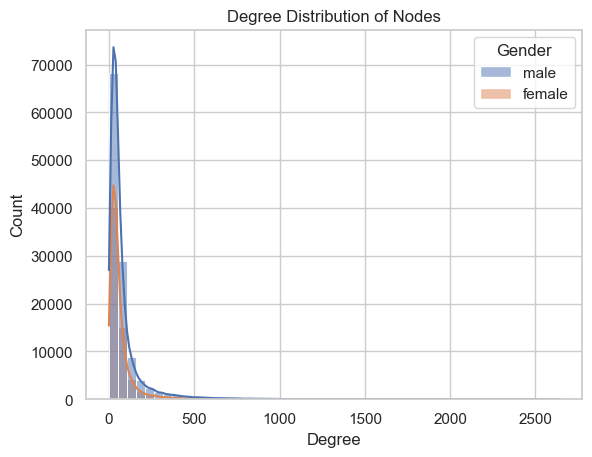

In [478]:
# Compute the degree of each node
degrees = dict(G_bi.degree())

# Create a dataframe with the degree and gender information
data = {'Degree': list(degrees.values()), 'Gender': [G_bi.nodes[node]['gender'] for node in G_bi.nodes]}
df = pd.DataFrame(data)

# Create a histogram of the degree distribution, hued by gender
sns.histplot(data=df, x='Degree', hue='Gender', bins=50,kde = True)

# Set plot labels and title
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution of Nodes')

# Show the plot
plt.show()

In [4]:
with open('graph_with_att.json', 'r') as f:
    data = json.load(f)
G = json_graph.node_link_graph(data)
len(G)

13511

## Visualize the top actors network

In [28]:
# Loop through the nodes and remove the first whitespace in the name if there is one
for node in G_bi.nodes():
    if " " in node:
        new_node = node.replace(" ", "", 1)
        G_bi = nx.relabel_nodes(G_bi, {node: new_node})

KeyboardInterrupt: 

In [39]:
node_degrees = G_bi.degree()

# Sort the nodes based on their degrees in descending order
sorted_nodes = sorted(node_degrees, key=lambda x: x[1], reverse=True)

# Select the top "x" nodes with the highest degrees
x = 200# Number of nodes to include in the subgraph
top_nodes = [node for node, _ in sorted_nodes[:x]]

# Create a subgraph containing only the selected nodes and their adjacent edges
subgraph = G_bi.subgraph(top_nodes)

In [40]:
netwulf.visualize(subgraph)

(None, None)

In [31]:
subgraph.nodes()

NodeView(())

In [32]:
top_nodes

[' Samuel L. Jackson',
 ' Richard Schiff',
 ' Richard Jenkins',
 ' Keith David',
 ' Steve Buscemi',
 ' John Goodman',
 ' Morgan Freeman',
 ' Christopher Walken',
 ' Stanley Tucci',
 ' Mike Starr']